## Mini Projet: Traitement des méthodes de régularisation

#### Importation des bibliotheque necessaire:

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, auc
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### Traitement :

In [42]:
#Chargement des donnees:
df=pd.read_csv("Mohamed Belannab - efficacite_energetique_Dataset.csv")


#Netoyage des donnees:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


print("Shape: {}".format(df.shape))
print("nombre des valeurs dupliquer: {}".format(df.duplicated().sum()))
print("nombre des des colonnes valeurs null: {} ".format(df.isnull().sum().sum()))
print("nombre des lignes valeurs null: ")
print(df.isnull().sum())

df.head()

Shape: (200, 24)
nombre des valeurs dupliquer: 0
nombre des des colonnes valeurs null: 0 
nombre des lignes valeurs null: 
Wall_Area                   0
Roof_Area                   0
Window_Area                 0
Overall_Height              0
Outdoor_Temperature         0
Humidity                    0
Energy_Efficiency_Rating    0
Noise_Feature_1             0
Noise_Feature_2             0
Noise_Feature_3             0
Noise_Feature_4             0
Noise_Feature_5             0
Noise_Feature_6             0
Noise_Feature_7             0
Noise_Feature_8             0
Noise_Feature_9             0
Noise_Feature_10            0
Orientation_East            0
Orientation_North           0
Orientation_South           0
Orientation_West            0
Glazing_Type_Type_A         0
Glazing_Type_Type_B         0
Glazing_Type_Type_C         0
dtype: int64


,Wall_Area,Roof_Area,Window_Area,Overall_Height,Outdoor_Temperature,Humidity,Energy_Efficiency_Rating,Noise_Feature_1,Noise_Feature_2,Noise_Feature_3,...,Noise_Feature_8,Noise_Feature_9,Noise_Feature_10,Orientation_East,Orientation_North,Orientation_South,Orientation_West,Glazing_Type_Type_A,Glazing_Type_Type_B,Glazing_Type_Type_C
0,388.202617,188.924545,44.013461,3.449571,13.102177,51.125928,166.376703,0.989088,0.904051,0.791454,...,0.067229,0.288525,0.518964,0,1,0,0,0,1,0
1,320.007860,192.818625,38.841030,5.417319,14.283884,53.690759,148.002019,0.818101,0.035220,0.623867,...,0.035538,0.571153,0.052572,1,0,0,0,0,0,1
2,348.936899,232.989788,57.666632,4.055632,8.869296,48.129687,173.574835,0.340605,0.180661,0.439745,...,0.420259,0.914694,0.682054,0,0,1,0,0,0,1
3,412.044660,219.657912,53.562928,5.238103,9.242672,50.771139,195.742252,0.152047,0.338514,0.010586,...,0.896694,0.738639,0.268888,0,0,1,0,0,1,0
4,393.377900,219.203946,32.314615,3.594037,13.584071,79.116164,168.598360,0.784059,0.577496,0.964928,...,0.277569,0.856666,0.106768,0,1,0,0,0,1,0


In [43]:
# Liste des colonnes One-Hot à exclure
colonnes_one_hot = [
    "Orientation_East", "Orientation_North", "Orientation_South", "Orientation_West",
    "Glazing_Type_Type_A", "Glazing_Type_Type_B", "Glazing_Type_Type_C"
]

# Sélectionner les colonnes numériques sauf les colonnes One-Hot
colonnes_numeriques = df.select_dtypes(include='number').columns.difference(colonnes_one_hot)

# Appliquer le traitement des valeurs aberrantes uniquement sur les colonnes numériques sélectionnées
df[colonnes_numeriques] = df[colonnes_numeriques].apply(
    lambda col: col.clip(
        lower=col.quantile(0.25) - 1.5 * (col.quantile(0.75) - col.quantile(0.25)),
        upper=col.quantile(0.75) + 1.5 * (col.quantile(0.75) - col.quantile(0.25))
    )
)

# Afficher les premières lignes du DataFrame
print(df.head())

    Wall_Area   Roof_Area  Window_Area  Overall_Height  Outdoor_Temperature  \
0  388.202617  188.924545    44.013461        3.449571            13.102177   
1  320.007860  192.818625    38.841030        5.417319            14.283884   
2  348.936899  232.989788    57.666632        4.055632             8.869296   
3  412.044660  219.657912    53.562928        5.238103             9.242672   
4  393.377900  219.203946    32.314615        3.594037            13.584071   

    Humidity  Energy_Efficiency_Rating  Noise_Feature_1  Noise_Feature_2  \
0  51.125928                166.376703         0.989088         0.904051   
1  53.690759                148.002019         0.818101         0.035220   
2  48.129687                173.574835         0.340605         0.180661   
3  50.771139                195.533618         0.152047         0.338514   
4  73.520822                168.598360         0.784059         0.577496   

   Noise_Feature_3  ...  Noise_Feature_8  Noise_Feature_9  Noise_Fea

In [44]:


numerical_cols = ['Wall_Area', 'Roof_Area', 'Window_Area', 'Overall_Height',
                      'Outdoor_Temperature', 'Humidity','Noise_Feature_1'
                      ,'Noise_Feature_2' , 'Noise_Feature_3' , 'Noise_Feature_4' , 'Noise_Feature_5'
                      ,'Noise_Feature_6' , 'Noise_Feature_7' , 'Noise_Feature_8']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()



,Wall_Area,Roof_Area,Window_Area,Overall_Height,Outdoor_Temperature,Humidity,Energy_Efficiency_Rating,Noise_Feature_1,Noise_Feature_2,Noise_Feature_3,...,Noise_Feature_8,Noise_Feature_9,Noise_Feature_10,Orientation_East,Orientation_North,Orientation_South,Orientation_West,Glazing_Type_Type_A,Glazing_Type_Type_B,Glazing_Type_Type_C
0,1.657631,-0.259051,-0.483083,-1.462999,-0.447970,0.082060,166.376703,1.720967,1.371641,1.012211,...,-1.473225,0.288525,0.518964,0,1,0,0,0,1,0
1,0.322341,-0.120704,-0.990190,0.562646,-0.208856,0.347355,148.002019,1.135259,-1.673027,0.427471,...,-1.577369,0.571153,0.052572,1,0,0,0,0,0,1
2,0.888787,1.306474,0.855481,-0.839106,-1.304477,-0.227859,173.574835,-0.500385,-1.163355,-0.214960,...,-0.313062,0.914694,0.682054,0,0,1,0,0,0,1
3,2.124471,0.832827,0.453152,0.378158,-1.228926,0.045362,195.533618,-1.146281,-0.610183,-1.712371,...,1.252645,0.738639,0.268888,0,0,1,0,0,1,0
4,1.758966,0.816698,-1.630043,-1.314282,-0.350460,2.398496,168.598360,1.018648,0.227287,1.617492,...,-0.781984,0.856666,0.106768,0,1,0,0,0,1,0


#### Logistic regression ( entrainemenet et evaluation ):

Matrice de confusion (ensemble de test) :
[[37  3]
 [ 3 17]]


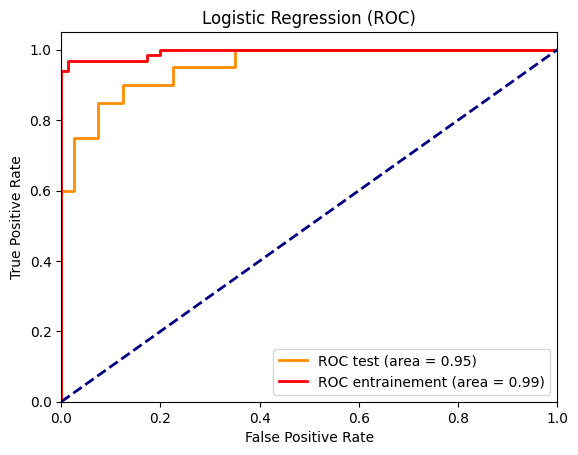

Marrge entre auc d'entranement et e test: 0.04


In [45]:
#preparation des train et test datasets:

max_value = df['Energy_Efficiency_Rating'].max()
min_value = df['Energy_Efficiency_Rating'].min()
milieu = (min_value + max_value) / 2
df['Energy_Efficiency_Class'] = (df['Energy_Efficiency_Rating'] > milieu).astype(int)
X = df.drop(['Energy_Efficiency_Rating' , 'Energy_Efficiency_Class'], axis=1)
y = df['Energy_Efficiency_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# creation Logistic Regression model:
model = LogisticRegression(max_iter=1000)  

# entrainement de model sur training dataset:
model.fit(X_train, y_train)

# Prediction ( test et entrainmenet)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# calcule probabilite d'avoir positive class ( class 1) en test data:
y_test_proba = model.predict_proba(X_test)[:, 1]

# calculation du ROC curve et AUC pour test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print("Matrice de confusion (ensemble de test) :")
print(confusion_matrix(y_test, y_test_pred))


# calcule probabilite d'avoir positive class ( class 1) en enttrainement data:
y_train_proba = model.predict_proba(X_train)[:, 1]

# calculation du ROC curve et AUC pour entrainement
fpr_train, tpr_train, thresholds2 = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot de ROC ( test et train)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'ROC entrainement (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC)')
plt.legend(loc="lower right")
plt.show()

# marge entre auc ( test et train)
print(f"Marrge entre auc d'entranement et e test: {(roc_auc_train-roc_auc_test):.2f}")




#### LG avec regularization  lasso (L1) :

Meilleure lambda pour Lasso (L1) regularization: 0.21181818181818182
Matrice de confusion (ensemble de test) :
[[37  3]
 [ 3 17]]


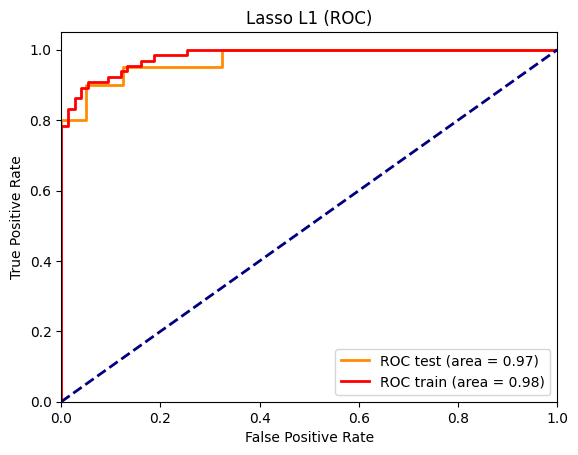

Marge auc entre train et test: : 0.01


In [58]:

# definire lambdas:
lambda_values = np.linspace(0.01, 10, 100)

# model lasso:
log_l1_model = LogisticRegressionCV(
    penalty='l1',  # Definire lasso refularization
    solver='saga',
    max_iter=10000,
    Cs=lambda_values, 
    cv=10,
    random_state=42
)

# entrainement
log_l1_model.fit(X_train, y_train)

#meilleure lambda:
best_C = log_l1_model.C_[0] 
print(f"Meilleure lambda pour Lasso (L1) regularization: {best_C}")

# prediction ( train et test)
y_train_pred_l1 = log_l1_model.predict(X_train)
y_test_pred_l1 = log_l1_model.predict(X_test)

# probabilites pour (class 1) en test:
y_test_proba_l1 = log_l1_model.predict_proba(X_test)[:, 1]

# ROC test
fpr_test_l1, tpr_test_l1, thresholds_l1 = roc_curve(y_test, y_test_proba_l1)
roc_auc_test_l1 = auc(fpr_test_l1, tpr_test_l1)

# probabilites pour (class 1) en train:
y_train_proba_l1 = log_l1_model.predict_proba(X_train)[:, 1]
print("Matrice de confusion (ensemble de test) :")
print(confusion_matrix(y_test, y_test_pred))

# roc train
fpr_train_l1, tpr_train_l1, thresholds_l1 = roc_curve(y_train, y_train_proba_l1)
roc_auc_train_l1 = auc(fpr_train_l1, tpr_train_l1)

# Roc curve
plt.figure()
plt.plot(fpr_test_l1, tpr_test_l1, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test_l1:.2f})')
plt.plot(fpr_train_l1, tpr_train_l1, color='red', lw=2, label=f'ROC train (area = {roc_auc_train_l1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lasso L1 (ROC)')
plt.legend(loc="lower right")
plt.show()

# marge entre train test auc:
print(f"Marge auc entre train et test: : {(roc_auc_train_l1-roc_auc_test_l1):.2f}")


#### Ridge L2( entrainement et evaluation ):

Meilleure lambda pour Ridge (L2) regularization: 0.01


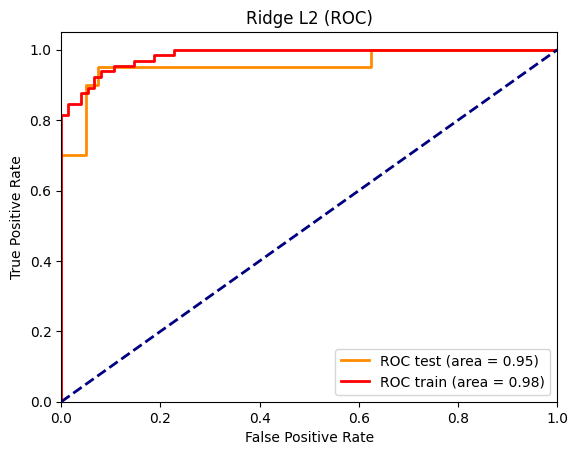

Marge auc entre train et test: : 0.03


In [47]:
# model Ridge:
log_l2_model = LogisticRegressionCV(
    penalty='l2',  # Definire lasso refularization
    solver='saga',
    max_iter=10000,
    Cs=lambda_values, 
    cv=10,
    random_state=42
)

# entrainement
log_l2_model.fit(X_train, y_train)

#meilleure lambda:
best_C = log_l2_model.C_[0] 
print(f"Meilleure lambda pour Ridge (L2) regularization: {best_C}")

# prediction ( train et test)
y_train_pred_l2 = log_l2_model.predict(X_train)
y_test_pred_l2 = log_l2_model.predict(X_test)

# probabilites pour (class 1) en test:
y_test_proba_l2 = log_l2_model.predict_proba(X_test)[:, 1]

# ROC test
fpr_test_l2, tpr_test_l2, thresholds_l2 = roc_curve(y_test, y_test_proba_l2)
roc_auc_test_l2 = auc(fpr_test_l2, tpr_test_l2)

# probabilites pour (class 1) en train:
y_train_proba_l2 = log_l2_model.predict_proba(X_train)[:, 1]

# roc train
fpr_train_l2, tpr_train_l2, thresholds_l2 = roc_curve(y_train, y_train_proba_l2)
roc_auc_train_l2 = auc(fpr_train_l2, tpr_train_l2)

# Roc curve
plt.figure()
plt.plot(fpr_test_l2, tpr_test_l2, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test_l2:.2f})')
plt.plot(fpr_train_l2, tpr_train_l2, color='red', lw=2, label=f'ROC train (area = {roc_auc_train_l2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ridge L2 (ROC)')
plt.legend(loc="lower right")
plt.show()

# marge entre train test auc:
print(f"Marge auc entre train et test: : {(roc_auc_train_l2-roc_auc_test_l2):.2f}")


#### ElasticNet ( entrainement et eveluation ):

Meilleure lambda pour ELASTICNET regularization: 0.21181818181818182


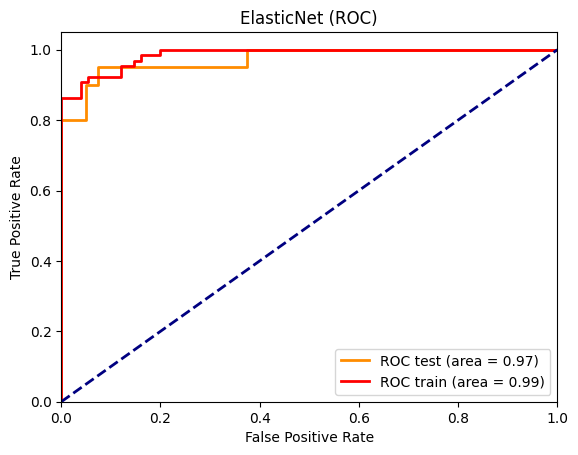

Marge auc entre train et test: : 0.01


In [48]:
# model ELASTICNET:
log_EN_model = LogisticRegressionCV(
    penalty='elasticnet',  # Definire lasso refularization
    solver='saga',
    max_iter=10000,
    Cs=lambda_values,
    l1_ratios=[0.7],
    cv=10,
    random_state=42
)

# entrainement
log_EN_model.fit(X_train, y_train)

#meilleure lambda:
best_C = log_EN_model.C_[0] 
print(f"Meilleure lambda pour ELASTICNET regularization: {best_C}")

# prediction ( train et test)
y_train_pred_EN = log_EN_model.predict(X_train)
y_test_pred_EN = log_EN_model.predict(X_test)

# probabilites pour (class 1) en test:
y_test_proba_EN = log_EN_model.predict_proba(X_test)[:, 1]

# ROC test
fpr_test_EN, tpr_test_EN, thresholds_EN = roc_curve(y_test, y_test_proba_EN)
roc_auc_test_EN = auc(fpr_test_EN, tpr_test_EN)

# probabilites pour (class 1) en train:
y_train_proba_EN = log_EN_model.predict_proba(X_train)[:, 1]

# roc train
fpr_train_EN, tpr_train_EN, thresholds_EN = roc_curve(y_train, y_train_proba_EN)
roc_auc_train_EN = auc(fpr_train_EN, tpr_train_EN)

# Roc curve
plt.figure()
plt.plot(fpr_test_EN, tpr_test_EN, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test_EN:.2f})')
plt.plot(fpr_train_EN, tpr_train_EN, color='red', lw=2, label=f'ROC train (area = {roc_auc_train_EN:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ElasticNet (ROC)')
plt.legend(loc="lower right")
plt.show()

# marge entre train test auc:
print(f"Marge auc entre train et test: : {(roc_auc_train_EN-roc_auc_test_EN):.2f}")


In [49]:
y_pred=model.predict(X_train)
acc_train=r2_score(y_pred,y_train)
mse_train = mean_squared_error(y_pred,y_train)

y_pred_test=model.predict(X_test)

acc_test=r2_score(y_pred_test,y_test)
mse_test = mean_squared_error(y_pred_test,y_test)

print("R2: Accuracy trainning : {} Accuracy Testing : {}".format(acc_train,acc_test))
print("L'ecart du performance du regression linear simple: {:.2f}%".format(np.abs((acc_train-acc_test)*100)))
print("MSE: Erreur trainning : {} Erreur Testing : {}".format(mse_train,mse_test))
print("L'ecart d'erreur du regression linear simple: {:.2f}".format(mse_test-mse_train))

R2: Accuracy trainning : 0.8837933181157916 Accuracy Testing : 0.55
L'ecart du performance du regression linear simple: 33.38%
MSE: Erreur trainning : 0.02857142857142857 Erreur Testing : 0.1
L'ecart d'erreur du regression linear simple: 0.07


- ##### **R2**: 
    - Écart de performance entre l'entraînement et le test dans la regression simple est: 9.07%
- ##### **MSE**: 
    - L'ecart d'erreur du regression linear simple est : 15.06
- ##### **Résume**:
  - un écart de performance de 9.07% entre l'entraînement et les tests, suggérant un léger **sur apprentissage**, où le modèle est bien ajusté aux données d'entraînement, mais perd de sa précision sur les nouvelles données. De plus, l'écart d'erreur de 15.06 en MSE indique que les erreurs sont significativement plus grandes sur les données de test, renforçant l'idée d'une mauvaise généralisation du modèle.

  
#### (Rppel) Linear Regression avec regularization L1(Lasso) ( entrainement et evaluation ):



In [50]:
from sklearn.linear_model import LassoCV, Lasso
#trouver la meilleur alpha (lambda):
lambda1 = np.linspace(0, 10, 20)  
lassoCV = LassoCV(alphas=lambda1, cv=10, max_iter=1000000)

lassoCV.fit(X_train,y_train)
best_alpha = lassoCV.alpha_
print("best vel alpha ",best_alpha)


best vel alpha  0.0


In [51]:
#utilistion du lasso avec la meilleur alpha :
reg_L1 = Lasso(alpha=best_alpha)
reg_L1.fit(X_train, y_train)

y_pred_train_l1=reg_L1.predict(X_train)
y_pred_test_l1=reg_L1.predict(X_test)

acc_train_L1=r2_score(y_pred_train_l1,y_train)
acc_test_L1=r2_score(y_pred_test_l1,y_test)

mse_train_L1 = mean_squared_error(y_pred_train_l1 ,y_train )
mse_test_L1 = mean_squared_error(y_pred_test_l1, y_test )

print("R2: Accuracy trainning : {} Accuracy Testing : {}".format(acc_train_L1,acc_test_L1))
print("L'ecart du performance du regression linear avec Lasso: {:.2f}%".format(np.abs((acc_train_L1-acc_test_L1)*100)))
print("MSE: Erreur trainning : {} Erreur Testing : {}".format(mse_train_L1,mse_test_L1))
print("L'ecart d'erreur du regression linear avec Lasso: {:.2f}".format(mse_test_L1-mse_train_L1))

R2: Accuracy trainning : 0.5859588271218387 Accuracy Testing : -0.017611743911492672
L'ecart du performance du regression linear avec Lasso: 60.36%
MSE: Erreur trainning : 0.07282827505581958 Erreur Testing : 0.10818498004644303
L'ecart d'erreur du regression linear avec Lasso: 0.04


- ##### **R2**: 
    - Écart de performance entre l'entraînement et le test dans la regression avec **Lasso** est: 7.14%
- ##### **MSE**: 
    - L'ecart d'erreur du regression linear **Lasso** est : 8.12
- ##### **Résume**:
  -  Cela montre que l'écart de performance et d'erreur avec **Lasso** est plus faible que celui obtenu avec la **régression linéaire** simple.

  
####  Linear Regression avec regularization L2(Ridge) ( entrainement et evaluation ):




In [52]:
from sklearn.linear_model import RidgeCV, ElasticNet, Ridge

#trouver la meilleur alpha (lambda):
lambda2 = np.linspace(0, 10, 20)
ridgeCV = RidgeCV(alphas=lambda2, cv=10)
ridgeCV.fit(X_train, y_train)

best_alpha_ridge = ridgeCV.alpha_
print("best val alpha for Ridge :", best_alpha_ridge)

best val alpha for Ridge : 10.0


In [53]:
#utilistion du ridge avec la meilleur alpha :
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_test, y_test)

ridge_y_pred_train = ridge_model.predict(X_train)
ridge_y_pred_test = ridge_model.predict(X_test)

ridge_r2_train = r2_score(y_train, ridge_y_pred_train)
ridge_r2_test = r2_score(y_test, ridge_y_pred_test)

mse_train_ridge = mean_squared_error(ridge_y_pred_train,y_train)
mse_test_ridge = mean_squared_error(ridge_y_pred_test,y_test )

print("R2: Accuracy trainning : {} Accuracy Testing : {}".format(ridge_r2_train,ridge_r2_test))
print("L'ecart du performance du regression linear avec Ridge: {:.2f}%".format(np.abs((ridge_r2_train-ridge_r2_test)*100)))
print("MSE: Erreur trainning : {} Erreur Testing : {}".format(mse_train_L1,mse_test_L1))
print("L'ecart d'erreur du regression linear avec Ridge: {:.2f}".format(mse_train_ridge-mse_test_ridge))

R2: Accuracy trainning : 0.5579086188707969 Accuracy Testing : 0.7163676243326225
L'ecart du performance du regression linear avec Ridge: 15.85%
MSE: Erreur trainning : 0.07282827505581958 Erreur Testing : 0.10818498004644303
L'ecart d'erreur du regression linear avec Ridge: 0.05


- ##### **R2**: 
    - Écart de performance entre l'entraînement et le test dans la regression avec **Ridge** est: 0.33%
- ##### **MSE**: 
    - L'ecart d'erreur du regression linear **Ridge** est : 10.53
- ##### **Résume**:
  -  Le modèle **Ridge** présente un écart de performance plus faible (0.33%) et un meilleur équilibre entre l'entraînement et les tests par rapport au **Lasso**, qui souffre d'un écart plus important (7.14%) et d'une légère perte de précision sur les données de test. Cependant, le **Lasso** tend à sélectionner plus de variables en éliminant celles moins importantes, tandis que **Ridge** pénalise les coefficients sans les réduire à zéro. Ainsi, **Ridge** est plus adapté pour des modèles où toutes les variables doivent être conservées, tandis que **Lasso** est utile pour la sélection de variables.

####  Linear Regression avec regularization ElasticNetCV ( entrainement et evaluation ):



In [54]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
# choix du meilleiure alpha d'ElasticNetCV
lambda3 = np.linspace(0, 10, 20)
elastic_net_cv = ElasticNetCV(alphas=lambda3,cv=10) 
elastic_net_cv.fit(X_train, y_train)

best_alpha_en = elastic_net_cv.alpha_

print(f"Best alpha for ElasticNet: {best_alpha_en}")

Best alpha for ElasticNet: 0.0


In [55]:
# Utilisation d'ElasticNet avec best alpha:
elastic_net_model = ElasticNet(alpha=best_alpha_en)
elastic_net_model.fit(X_train, y_train)

elastic_net_y_pred_train = elastic_net_model.predict(X_train)
elastic_net_y_pred_test = elastic_net_model.predict(X_test)

elastic_net_r2_train = r2_score(y_train, elastic_net_y_pred_train)
elastic_net_r2_test = r2_score(y_test, elastic_net_y_pred_test)

mse_train_elasticnet = mean_squared_error(elastic_net_y_pred_train,y_train)
mse_test_elasticnet = mean_squared_error(elastic_net_y_pred_test,y_test)

print("Accuracy trainning : {} Accuracy Testing : {}".format(elastic_net_r2_train,elastic_net_r2_test))
print("L'ecart du performance du regression linear avec ElasticNet: {:.2f}%".format(np.abs((elastic_net_r2_train-elastic_net_r2_test)*100)))
print("MSE: Erreur trainning : {} Erreur Testing : {}".format(mse_train_L1,mse_test_L1))
print("L'ecart d'erreur du regression linear avec ElasticNet: {:.2f}".format(mse_test_elasticnet-mse_train_elasticnet))


Accuracy trainning : 0.7071929864422433 Accuracy Testing : 0.5131675897910064
L'ecart du performance du regression linear avec ElasticNet: 19.40%
MSE: Erreur trainning : 0.07282827505581958 Erreur Testing : 0.10818498004644303
L'ecart d'erreur du regression linear avec ElasticNet: 0.04


- ##### **R2**: 
    - Écart de performance entre l'entraînement et le test dans la regression avec **ElasticNet** est: 6.71%
- ##### **MSE**: 
    - L'ecart d'erreur du regression linear **ElasticNet** est : 8.97
- ##### **Résume**:
  -  **Ridge** montre le meilleur équilibre avec un écart de performance de 0.33% et un écart d'erreur de 10.53, indiquant une excellente généralisation. **ElasticNet** présente un écart de performance de 6.71% et un écart d'erreur de 8.97, offrant un compromis entre **Lasso** (7.14% d'écart de performance) et **Ridge**, mais avec une légère perte de stabilité par rapport à ce dernier.

#### Conclusion:
En résumé, **Ridge** offre la meilleure généralisation avec un écart de performance faible, suivi de **ElasticNet**, qui trouve un bon compromis entre sélection de variables et régularisation. **Lasso** , bien qu'efficace pour la sélection de variables, souffre d'un sur-apprentissage, comme en témoigne son écart de performance plus élevé.

In [56]:
# comparaison des parameters de chaque model:
coef_comparison = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficients Linéaire": model.coef_,
    "Coefficients Ridge": ridge_model.coef_,
    "Coefficients Lasso": reg_L1.coef_,
    "Coefficients ElasticNet": elastic_net_model.coef_
})

coef_comparison

ValueError: Per-column arrays must each be 1-dimensional